In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from scipy.stats import pareto
from scipy.stats import lognorm

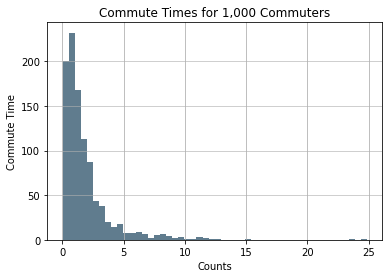

In [3]:
size, scale = 1000, 2
somme = pd.Series(np.random.pareto(scale, size=size) + np.random.pareto(scale, size=size))
pareto = pd.Series(np.random.pareto(scale, size=size))
somme.plot.hist(grid=True, bins=50, rwidth=1,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

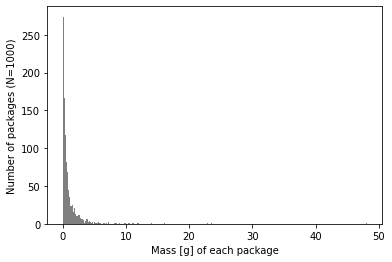

In [4]:
N = 1000
d = np.random.pareto(2, size=N)
plt.hist(d, color="grey", bins='auto')
plt.xlabel("Mass [g] of each package")
plt.ylabel("Number of packages (N={})".format(N))
plt.show()

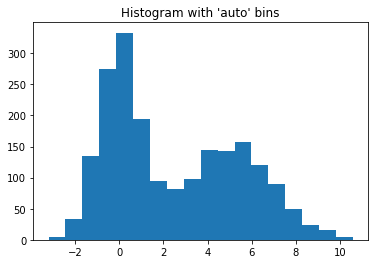

In [5]:

rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))
_ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

In [124]:
hist, bin_edges = np.histogram(a, bins='auto',density=True)
print(bin_edges)

[-3.20440134 -2.43824952 -1.67209769 -0.90594587 -0.13979404  0.62635779
  1.39250961  2.15866144  2.92481326  3.69096509  4.45711692  5.22326874
  5.98942057  6.75557239  7.52172422  8.28787605  9.05402787  9.8201797
 10.58633152]


In [123]:
np.sum(hist * np.diff(bin_edges))

1.0

In [139]:
N = 1000
d = np.random.pareto(2, size=N)
hist, bin_edges = np.histogram(d,bins=1000, density = True)

In [140]:
np.sum(hist*np.diff(bin_edges))

1.0

### Test de convergence de P(X_1 + X_2 > t) / P(X_1 > t) vers 2

Dans cette partie X suit une loi de Paréto de paramètre égal à 2 

In [6]:
def get_Int(bin_edges, t): # Retourne l'indice du premier bord de bin dont la réalisation est au dessus de t
    nb = len(bin_edges)
    i = 0
    done = 0
    if t>bin_edges[-1]:
        print("aucune réalisation suppérieure à t")
    if t <= bin_edges[-1]:
        while done == 0 :
            if bin_edges[i] < t: 
                i = i + 1
            if bin_edges[i] > t:
                done = 1 
    return i 

In [7]:
def calc_Prob(t, hist, bin_edges): #Calcule P(X>t)
    return np.sum(hist[t:]*np.diff(bin_edges[t:]))


In [8]:
N = 100000000
X_1 = np.random.pareto(2, size=N)
X_2 = np.random.pareto(2, size=N)
hist, bin_edges = np.histogram(X_1+X_2,bins=1000, density = True)

In [9]:
X_3 = np.random.pareto(2, size=N)
hist_1, bin_edges_1 = np.histogram(X_3,bins=1000, density = True)

In [13]:
Tfin = 2000

In [14]:
P = np.zeros(Tfin)
for t in range(1,Tfin,1):
    P_Somme = calc_Prob(get_Int(bin_edges,t), hist, bin_edges)
    P_X3 =  calc_Prob(get_Int(bin_edges_1,t), hist_1, bin_edges_1)
    P[t] = P_Somme/P_X3
    

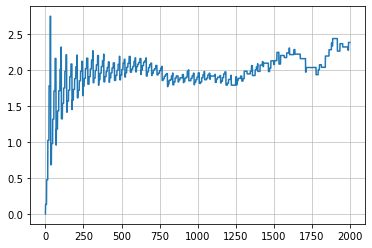

In [8]:
plt.plot(P)
plt.grid( alpha=0.75)

### Expériementation

In [96]:
def estime_Esp(loi = 1 , NbVar = 100000, param_W = 2, Nb_Cycles = 10, inter = 10,c = 1):
    W = np.random.exponential(param_W, size=NbVar)
    first = 0
    last = first + inter
    if loi == 0: 
        X = np.random.exponential(2, size=NbVar)
    
    if loi == 1:
        X = np.random.uniform(size=NbVar)
        
    if loi == 2:
        X = np.abs(np.random.normal(0,1,size=NbVar))
    
    def search(first, last):
        K = np.linspace(first, last,last-first )
        NbK = last - first
        for i in range(NbK):
            somme = 0
            for j in range(NbVar):
                somme = np.exp(K[i]*(X[j] - c*W[j]))
            K[i] = somme/NbVar
        return K
    
    def one_in(K):
        new_first = 0
        new_last = 1
        for i in range(len(K)-1):
            if K[i]<1 and K[i+1]> 1: 
                new_first = i 
                new_last = i+1
            else :
                new_first = len(K)
                new_last = len(K)+inter
        return new_first, new_last
    
    if Nb_Cycles == 1:
        return search(first,last)
    
    if Nb_Cycles > 1:
        for i in range(Nb_Cycles):
            K = search(first,last)
            first,last = one_in(K)   
            return K
        
    else : return Null
    

        

In [155]:
def estime_Esp1(loi = 1 , NbVar = 1000000, param_W = 2, first = 0, last = 2, inter=10, c = 2):
    W = np.random.exponential(param_W, size=NbVar)
    if loi == 0: 
        X = np.random.exponential(2, size=NbVar)
    
    if loi == 1:
        X = np.random.uniform(size=NbVar)
        
    if loi == 2:
        X = np.abs(np.random.normal(0,1,size=NbVar))
    

    K = np.linspace(first, last, inter )
    K2 = np.zeros(inter)
    for i in range(inter):
        somme = 0
        for j in range(NbVar):
            somme = somme + np.exp(K[i]*(X[j] - c*W[j]))
        K2[i] = somme/NbVar
    plt.plot(K, K2)



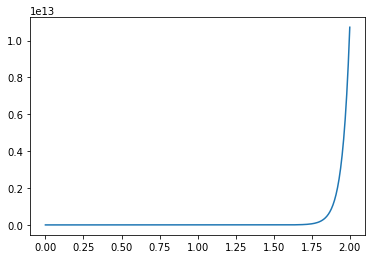

In [154]:
estime_Esp1(loi = 0 , NbVar = 100000, param_W = 2, first = 0, last = 2, inter=200, c = 2)

### Fonctions Utilisées pour l'estimation empirique de K 

In [172]:
def calcule_K(W , X, c, first, last, nb_points):
    K1 = np.linspace(first, last, nb_points )
    K2 = np.zeros(nb_points)
    NbVar = len(X)
    for i in range(nb_points):
        somme = 0
        for j in range(NbVar):
            somme = somme + np.exp(K1[i]*(X[j] - c*W[j]))
        K2[i] = somme/NbVar
    K = np.zeros((2,nb_points))
    K[0,:] = K1 # Les valeurs de K
    K[1,:] = K2 # L'estimation de l'espérence pour K = K[0,i]
    return K

In [14]:
def calcule_KInd(W , X, c, first, last, nb_points): # tous les K sont écris en majuscules ! 
    K1 = np.linspace(first, last, nb_points )
    K2 = np.zeros(nb_points)
    NbVar = len(X)
    for i in range(nb_points):
        s1 = 0
        s2 = 0
        Ka = K1[i]
        for j in range(NbVar):
            s1 = s1 + np.exp(Ka*(X[j]))
            s2 = s2 + np.exp( -Ka*c*W[j])
        K2[i] = (s1*s2)/NbVar**2
    K = np.zeros((2,nb_points))
    K[0,:] = K1 # Les valeurs de K
    K[1,:] = K2 # L'estimation de l'espérence pour K = K[0,i]
    return K

In [11]:
def affine_bornes_K(K):
    new_first = K[0,0] # Juste pour initialiser
    new_last = K[0,-1]
    i = 0
    T1 = []
    T2 = []
    while i < (len(K[0,:])):
        if K[1,i] > 1 and K[1,i-1]<1:
            T1.append(K[0,i-1])
            T2.append(K[0,i])
        i = i + 1
    T = [T1,T2]
    return T

#### On cherche K empiriquement en s'aident de l'intervalle contenant Kopt 

Penser a bien générer le jeux de variable dans une cellule diff que la recherche optimale de K !!! 

On supposera que W suit toujours une Exp(2) et c = 2 

#### Cas d'une variable Exp(2)

In [27]:
NbVar = 10000
c = 2
l1 = 1/2
l2 = 1/2
X = np.random.exponential(scale = l1, size=NbVar) # Scale = 1/lambda si on veut X~Exp(lambda) (python qui couille)
lamb_X = 1/l1
W = np.random.exponential(scale = l2, size=NbVar)
lamb_W = 1/l2
# dans ce cas particulier le K se calcule explicitement 
K_th = (c*lamb_X - lamb_W )/c
print('K théorique pour X~Exp: K ='+str(K_th))

K théorique pour X~Exp: K =1.0


[[1.035678391959799], [1.0452261306532662]]


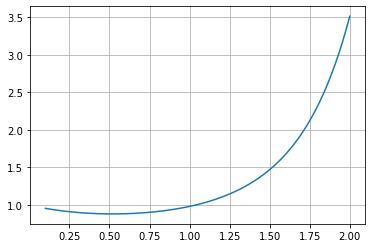

In [28]:
K = calcule_KInd(W,X,c,0.1,2,200)
T = affine_bornes_K(K)
print(T)
plt.plot(K[0,:],K[1,:])
plt.grid()

#### Cas d'une variable U[0,1]

In [245]:
NbVar = 1000
c = 2
X = np.random.uniform(0,1, size=NbVar)
W = np.random.exponential(2, size=NbVar)

[[4.51356783919598], [4.517085427135679]]


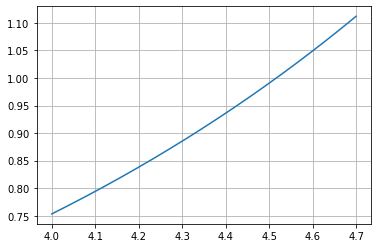

In [246]:
K = calcule_K(W,X,c,4,4.7,200)
T = affine_bornes_K(K)
print(T)
plt.plot(K[0,:],K[1,:])
plt.grid()

#### Cas d'une variable N(0,1) en valeur abs

In [251]:
NbVar = 1000
c = 2
X = np.abs(np.random.normal(0,1, size=NbVar))
W = np.random.exponential(2, size=NbVar)

[[1.8412060301507538], [1.8419597989949748]]


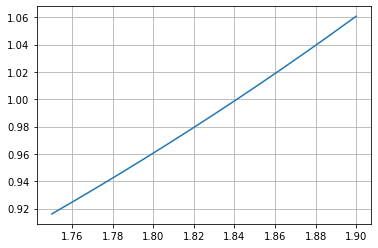

In [255]:
K = calcule_K(W,X,c,1.75,1.9,200)
T = affine_bornes_K(K)
print(T)
plt.plot(K[0,:],K[1,:])
plt.grid()

## Loi de weibull 


In [3]:
N = 100000000
X_1 = np.random.weibull(0.5, size=N)
X_2 = np.random.weibull(0.5, size=N)
hist, bin_edges = np.histogram(X_1+X_2,bins=10000, density = True)

In [94]:
X_3 = np.random.weibull(0.5, size=N)
hist_1, bin_edges_1 = np.histogram(X_3,bins=10000, density = True)

In [102]:
Tfin = 400

In [103]:
P = np.zeros(Tfin)
for t in range(1,Tfin,1):
    P_Somme = calc_Prob(get_Int(bin_edges,t), hist, bin_edges)
    P_X3 =  calc_Prob(get_Int(bin_edges_1,t), hist_1, bin_edges_1)
    P[t] = P_Somme/P_X3
    

aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation suppérieure à t
aucune réalisation s

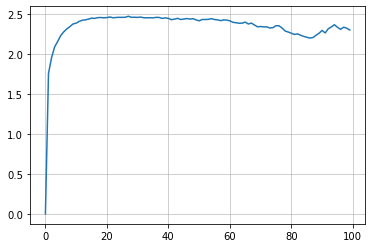

In [97]:
plt.plot(P)
plt.grid( alpha=0.75)

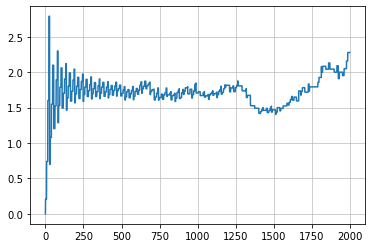

In [67]:
N = 100000000
X_1 = np.random.pareto(2, size=N)
X_2 = np.random.pareto(2, size=N)
hist, bin_edges = np.histogram(X_1+X_2,bins=1000, density = True)



X_3 = np.random.pareto(2, size=N)
hist_1, bin_edges_1 = np.histogram(X_3,bins=1000, density = True)





Tfin = 2000

P = np.zeros(Tfin)
for t in range(1,Tfin,1):
    P_Somme = calc_Prob(get_Int(bin_edges,t), hist, bin_edges)
    P_X3 =  calc_Prob(get_Int(bin_edges_1,t), hist_1, bin_edges_1)
    P[t] = P_Somme/P_X3
    

plt.plot(P)
plt.grid( alpha=0.75)

# Loi log normale

In [94]:
N = 1000000000
X_1  = lognorm.rvs(scale=np.exp(0.7),s = 0.7, size=N)
X_2 = lognorm.rvs(scale=np.exp(0.7),s = 0.7, size=N)
hist, bin_edges = np.histogram(X_1+X_2,bins=150, density = True)

X_6 =lognorm.rvs(scale=np.exp(0.7),s = 0.7, size=N)
hist_1, bin_edges_1 = np.histogram(X_6,bins=150, density = True)




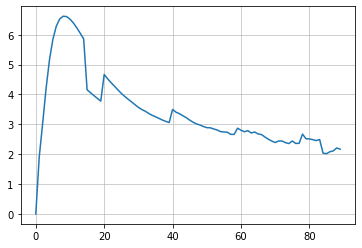

In [119]:
Tfin = 90
P = np.zeros(Tfin)
for t in range(1,Tfin,1):
    P_Somme = calc_Prob(get_Int(bin_edges,t), hist, bin_edges)
    P_X3 =  calc_Prob(get_Int(bin_edges_1,t), hist_1, bin_edges_1)
    P[t] = P_Somme/(P_X3)
    

plt.plot(P)
plt.grid( alpha=0.75)

In [ ]:
X_1  = lognorm.rvs(scale=np.exp(0.7869501),s = 0.7165545, size=N)

In [154]:
u = 100
c = 1.5
lamb = 0.54
def Psi(u,c,lamb,bin_edges_1,X_6,hist_1,N):
    est_mean = np.sum(X_6)/N
    integrale = 0 
    rho = (lamb*est_mean)/c
    for i in range(1,int(u)):
        integrale = integrale +(calc_Prob(get_Int(bin_edges_1,i), hist_1, bin_edges_1))
    F_I = (1/est_mean)*integrale
    Psi_u = (F_I)*est_mean/((c/lamb)-rho)
    return rho,Psi_u

In [140]:
rho,Psi_u = Psi(u,c,lamb,bin_edges_1,X_6,hist_1,N)


In [189]:
u = np.linspace(10, 100, 10 )
c = np.linspace(1.1, 10, 100 )
Res_Psi = np.zeros((10,10))
Res_rho = np.zeros((10,10))

In [177]:
for i in range(0,10):
    for j in range(0,10):
        print("i:"+str(i))
        print("j:"+str(j))
        Res_Psi[i,j] = Psi(u[i],c[j],lamb,bin_edges_1,X_6,hist_1,N)[1]
        Res_rho[i,j] = Psi(u[i],c[j],lamb,bin_edges_1,X_6,hist_1,N)[0]

i:0
j:0
i:0
j:1
i:0
j:2
i:0
j:3
i:0
j:4
i:0
j:5
i:0
j:6
i:0
j:7
i:0
j:8
i:0
j:9
i:1
j:0
i:1
j:1
i:1
j:2
i:1
j:3
i:1
j:4
i:1
j:5
i:1
j:6
i:1
j:7
i:1
j:8
i:1
j:9
i:2
j:0
i:2
j:1
i:2
j:2
i:2
j:3
i:2
j:4
i:2
j:5
i:2
j:6
i:2
j:7
i:2
j:8
i:2
j:9
i:3
j:0
i:3
j:1
i:3
j:2
i:3
j:3
i:3
j:4
i:3
j:5
i:3
j:6
i:3
j:7
i:3
j:8
i:3
j:9
i:4
j:0
i:4
j:1
i:4
j:2
i:4
j:3
i:4
j:4
i:4
j:5
i:4
j:6
i:4
j:7
i:4
j:8
i:4
j:9
i:5
j:0
i:5
j:1
i:5
j:2
i:5
j:3
i:5
j:4
i:5
j:5
i:5
j:6
i:5
j:7
i:5
j:8
i:5
j:9
i:6
j:0
i:6
j:1
i:6
j:2
i:6
j:3
i:6
j:4
i:6
j:5
i:6
j:6
i:6
j:7
i:6
j:8
i:6
j:9
i:7
j:0
i:7
j:1
i:7
j:2
i:7
j:3
i:7
j:4
i:7
j:5
i:7
j:6
i:7
j:7
i:7
j:8
i:7
j:9
i:8
j:0
i:8
j:1
i:8
j:2
i:8
j:3
i:8
j:4
i:8
j:5
i:8
j:6
i:8
j:7
i:8
j:8
i:8
j:9
i:9
j:0
i:9
j:1
i:9
j:2
i:9
j:3
i:9
j:4
i:9
j:5
i:9
j:6
i:9
j:7
i:9
j:8
i:9
j:9


j:0
j:1
j:2
j:3
j:4
j:5
j:6
j:7
j:8
j:9
j:10
j:11
j:12
j:13
j:14
j:15
j:16
j:17
j:18
j:19
j:20
j:21
j:22
j:23
j:24
j:25
j:26
j:27
j:28
j:29
j:30
j:31
j:32
j:33
j:34
j:35
j:36
j:37
j:38
j:39
j:40
j:41
j:42
j:43
j:44
j:45
j:46
j:47
j:48
j:49
j:50
j:51
j:52
j:53
j:54
j:55
j:56
j:57
j:58
j:59
j:60
j:61
j:62
j:63
j:64
j:65
j:66
j:67
j:68
j:69
j:70
j:71
j:72
j:73
j:74
j:75
j:76
j:77
j:78
j:79
j:80
j:81
j:82
j:83
j:84
j:85
j:86
j:87
j:88
j:89
j:90
j:91
j:92
j:93
j:94
j:95
j:96
j:97
j:98
j:99


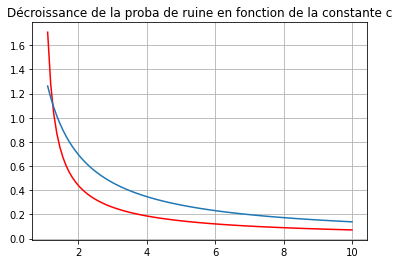

In [193]:
Vect_Psi = np.zeros(100)
Vect_Rho = np.zeros(100)
for j in range(0,100):
    print("j:"+str(j))
    Vect_Psi[j] = Psi(100,c[j],lamb,bin_edges_1,X_6,hist_1,N)[1]
    Vect_Rho[j] = Psi(100,c[j],lamb,bin_edges_1,X_6,hist_1,N)[0]
plt.plot(c,Vect_Psi,color='red')
plt.plot(c,Vect_Rho)
plt.title("Décroissance de la proba de ruine en fonction de la constante c")
plt.grid()
plt.show()

In [181]:
rho,Psi_u = Psi(100,15,lamb,bin_edges_1,X_6,hist_1,N)
print(rho)
print(Psi_u)

0.2778696014364045
0.147213834871129


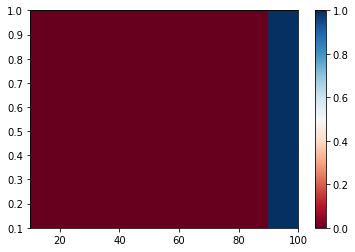

In [178]:
plt.pcolormesh(u,c,Res_Psi, cmap='RdBu', vmin=0, vmax=1)
plt.colorbar()